# Filling Missing Data in TimeSeries

<br>
Assume that you have a table containing only changes in a certain variable, for example Stock Position of certain or various goods in a certain period of time.

In [1]:
# Needed Libraries
import numpy as np
import pandas as pd

In [2]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let´s take a took on that sample creating a `DataFrame` from a csv file

In [3]:
df = pd.read_csv("stock_changes_sample.csv", sep=";", encoding="latin-1", low_memory=False, 
                 dtype={'STORE': 'category', 'ITEM': 'category'}, parse_dates=['DATE'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 4 columns):
DATE     3796 non-null datetime64[ns]
STORE    3796 non-null category
ITEM     3796 non-null category
STOCK    2915 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 82.5 KB


In [5]:
df.head()

,DATE,STORE,ITEM,STOCK
0,2018-01-05,L998,2105710,6.0
1,2018-01-05,L997,2105710,12.0
2,2018-01-05,L995,2105710,6.0
3,2018-01-05,L994,2105710,12.0
4,2018-01-05,L993,2105710,12.0


In [6]:
print("Number of Itens - "+str(len(df.ITEM.unique())))
print("Number of Stores - "+str(len(df.STORE.unique())))
print("Time period - START: "+str(df.DATE.min()).split(" ")[0]+" | END: "+str(df.DATE.max()).split(" ")[0])

Number of Itens - 10
Number of Stores - 200
Time period - START: 2018-01-05 | END: 2018-07-09


Let´s take a look on the situation of the dataset regarding missing spots

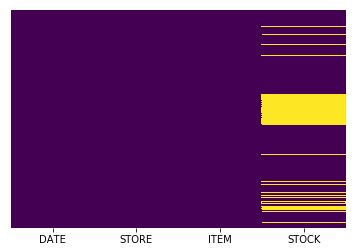

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Is fare to assume that all missing values correspond to zero values, so we can fill in with zeros

In [8]:
df.STOCK.fillna(0, inplace=True )

Now, let´s say you need to represent all days in a certain period within the limits of your original file. So we have to create a new `DataFrame` with all itens, stores and dates

In [9]:
import itertools as it

In [10]:
# Gathering Unique Categories
itens = df.ITEM.unique()
strs = df.STORE.unique()
drg = pd.date_range(start='2018-05-01', end='2018-05-31')

In [11]:
ndf = pd.DataFrame(data = list(it.product(drg, itens, strs)), columns=['DATE', 'ITEM', 'STORE'])

Let´s create a auxiliar KEY column

In [12]:
df['KEY'] = list(zip(df.ITEM, df.STORE))
ndf['KEY'] = list(zip(ndf.ITEM, ndf.STORE))

In [13]:
ndf['STOCK'] = np.nan

In [14]:
ndf.head()

,DATE,ITEM,STORE,KEY,STOCK
0,2018-05-01,2105710,L998,"(2105710, L998)",NaN
1,2018-05-01,2105710,L997,"(2105710, L997)",NaN
2,2018-05-01,2105710,L995,"(2105710, L995)",NaN
3,2018-05-01,2105710,L994,"(2105710, L994)",NaN
4,2018-05-01,2105710,L993,"(2105710, L993)",NaN


Now, the tricky part! lets create a groupby object and iterate over that group to fill in the STOCK values and measure the time taken to do that

In [15]:
import time as tm

In [16]:
ggr = df.groupby(['KEY'])

In [17]:
counter = 0
fst = tm.time() # Starting time point

for name, group in ggr:
    
    aux = group.copy()
    for date in aux.DATE:
        
        ndf['STOCK'] = np.where((ndf.KEY == name) & (ndf.DATE > date), 
                                aux[aux.DATE == date].STOCK.iloc[0], 
                                ndf.STOCK)
    
    counter += 1

lst = tm.time() # End time point

print("Total time: "+str(np.round(lst-fst,2))+"  |  Nº of Iterations: "+str(counter))

Total time: 31.31  |  Nº of Iterations: 1293


Let´s check one item in one store to see the result:

In [18]:
ndf[(ndf.ITEM == '2105710') & (ndf.STORE == '1222')]

,DATE,ITEM,STORE,KEY,STOCK
78,2018-05-01,2105710,1222,"(2105710, 1222)",6.0
2078,2018-05-02,2105710,1222,"(2105710, 1222)",6.0
4078,2018-05-03,2105710,1222,"(2105710, 1222)",6.0
6078,2018-05-04,2105710,1222,"(2105710, 1222)",6.0
8078,2018-05-05,2105710,1222,"(2105710, 1222)",6.0
10078,2018-05-06,2105710,1222,"(2105710, 1222)",6.0
12078,2018-05-07,2105710,1222,"(2105710, 1222)",6.0
14078,2018-05-08,2105710,1222,"(2105710, 1222)",6.0
16078,2018-05-09,2105710,1222,"(2105710, 1222)",6.0
18078,2018-05-10,2105710,1222,"(2105710, 1222)",6.0
